In [108]:
#Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt

Função que calcula a diferença quadrática entre as imagem global e a imagem do objeto, a diferença é calculada para cada posição do centro da imagem do objeto ao longo da imagem global

In [109]:
def quadratic_difference(img, obj):
    
    num_rows, num_cols = img.shape
    num_rows_obj, num_cols_obj = obj.shape   

    half_num_rows_obj = num_rows_obj//2        # O operador // retorna a parte inteira da divisão
    half_num_cols_obj = num_cols_obj//2

    # Cria imagem com zeros ao redor da borda. Note que ao invés de adicionarmos 0, seria mais 
    # preciso calcularmos a diferença quadrática somente entre pixels contidos na imagem.
    img_padded = np.pad(img, ((half_num_rows_obj,half_num_rows_obj),
                             (half_num_cols_obj,half_num_cols_obj)), 
                             mode='reflect')
    
    img_diff = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            # patch é a região de img de mesmo tamanho que obj e centrada em (row, col)
            patch = img_padded[row:row+num_rows_obj, col:col+num_cols_obj]
            # Utilizando numpy, o comando abaixo calcula a diferença entre cada valor
            # dos arrays 2D patch e obj
            diff_region = (patch - obj)**2
            img_diff[row, col] = np.sum(diff_region)
            
    return img_diff

Imagem Global / Objeto

Text(0.5, 1.0, 'Objeto')

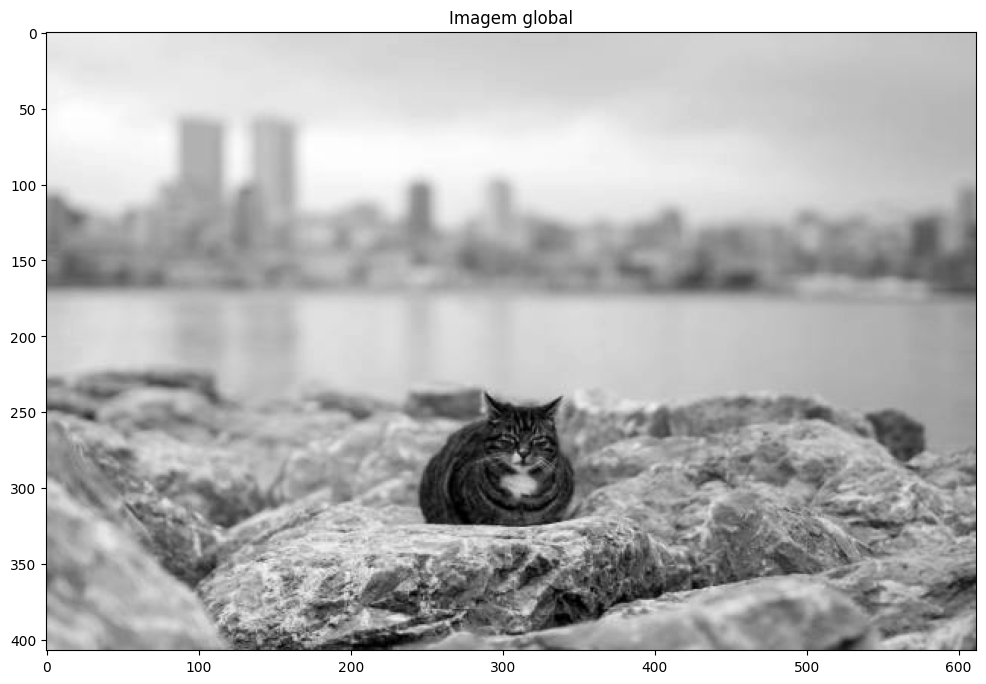

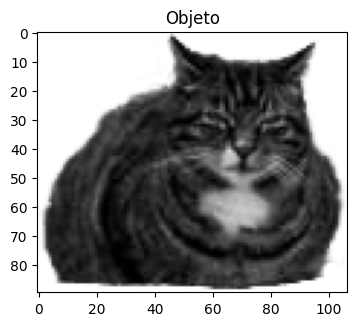

In [110]:
img_g = plt.imread('imagens/imagem_global.tiff')
img_g = img_g.astype(float)
img_o = plt.imread('imagens/gato.tiff')
img_o = img_o.astype(float)

plt.figure(figsize=[12,12])
plt.imshow(img_g, 'gray')
plt.title('Imagem global')
plt.figure(figsize=[4, 4])
plt.imshow(img_o, 'gray')
plt.title('Objeto')

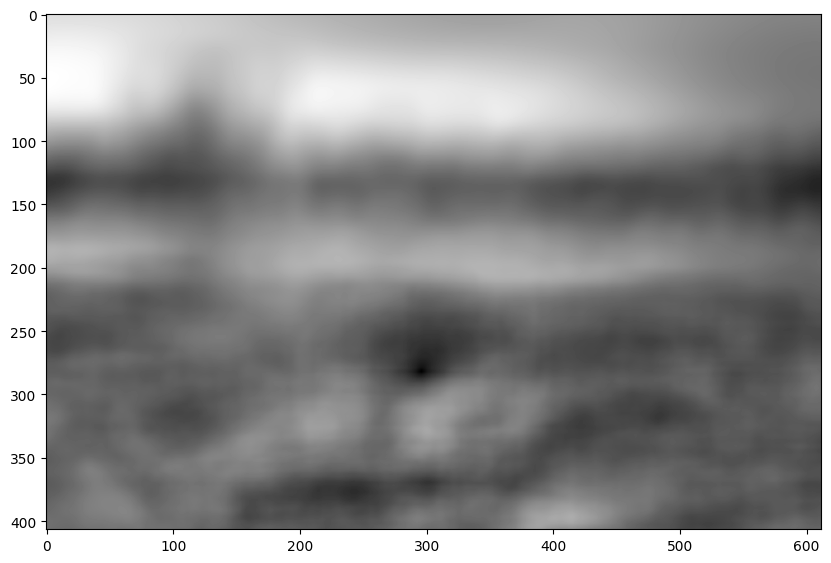

In [111]:
img_diff = quadratic_difference(img_g, img_o)
plt.figure(figsize=[10,10])
plt.imshow(img_diff, 'gray')

Função para encontra a posição do valor mínimo de img_diff

In [112]:
def find_minimum(img):
    
    ind_min = np.argmin(img)     # Índice do menor valor considerando img como um array 1D
    row_min = ind_min//img.shape[1]
    col_min = ind_min - row_min*img.shape[1]
    index = (row_min, col_min)
    smallest_val = img[index]
    
    return smallest_val, index
            
smallest_val, index = find_minimum(img_diff)
print('Menor diferença: {}'.format(smallest_val))
print('Posição: {}'.format(index))

Menor diferença: 40844301.0
Posição: (282, 296)


## Alterando o valor de gama($\gamma$)

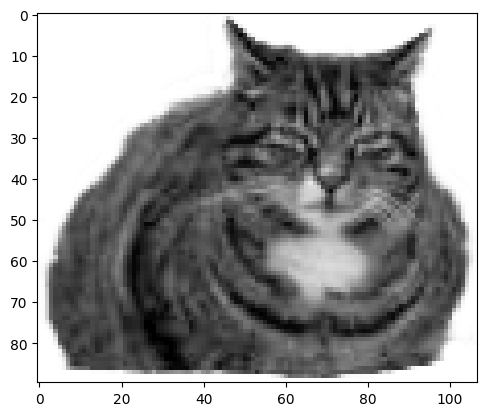

In [113]:
# Definir o valor de gama
gamma = 1.5

# Aplicar a transformação de gama à imagem
img_gama = (255 * (img_o / 255) ** (1 / gamma)).astype(np.uint8)

plt.imshow(img_gama, 'gray')


Podemos notar que o valor padrão para gama é 1, pois o valor da menor diferença é idêntico ao valor calculado anteriormente

In [114]:
img_diff_1 = quadratic_difference(img_g, img_gama)
smallest_val, index = find_minimum(img_diff_1)
print('Menor diferença: {}'.format(smallest_val))
print('Posição: {}'.format(index))

Menor diferença: 46682896.0
Posição: (134, 609)


Podemos notar que se aumentarmos ou diminuirmos o gama em 1.0 ou mais(para gama diferente de 0), temos a imagem do objeto totalmente diferente do contexto, ou seja, não ajudará a encontrar o valor ideal

Então vamos variar o valor de gama em 1 casa decimal...

Gama = 1.1



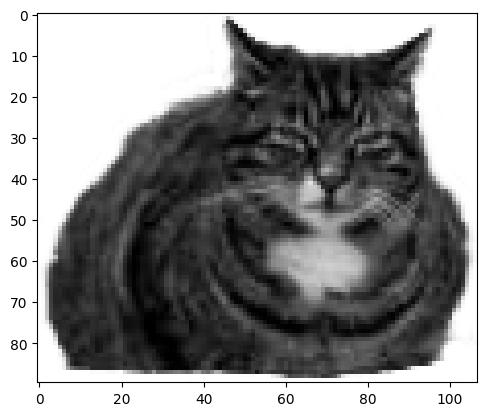

In [115]:
# Definir o valor de gama
gamma = 1.1

# Aplicar a transformação de gama à imagem
img_gama = (255 * (img_o / 255) ** (1 / gamma)).astype(np.uint8)

plt.imshow(img_gama, 'gray')

Calculando o gama = 1.1, notamos que o valor da menor diferença é pior que o com gama padrão

In [116]:
img_diff_2 = quadratic_difference(img_g, img_gama)
smallest_val, index = find_minimum(img_diff_2)
print('Menor diferença: {}'.format(smallest_val))
print('Posição: {}'.format(index))

Menor diferença: 41447025.0
Posição: (282, 296)


Calculando o gama = 0.9, notamos que o valor da menor diferença é melhor que o calculado com o gama padrão

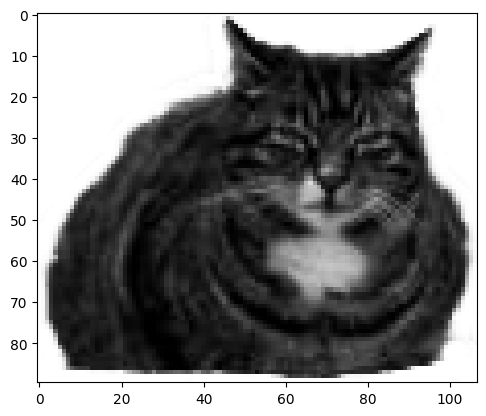

In [117]:
# Definir o valor de gama
gamma = 0.9

# Aplicar a transformação de gama à imagem
img_gama = (255 * (img_o / 255) ** (1 / gamma)).astype(np.uint8)

plt.imshow(img_gama, 'gray')

In [118]:
img_diff_3 = quadratic_difference(img_g, img_gama)
smallest_val, index = find_minimum(img_diff_3)
print('Menor diferença: {}'.format(smallest_val))
print('Posição: {}'.format(index))

Menor diferença: 40734871.0
Posição: (282, 296)


Calculando o gama = 0.8, notamos que o valor da menor diferença é pior que o calculado com o gama padrão

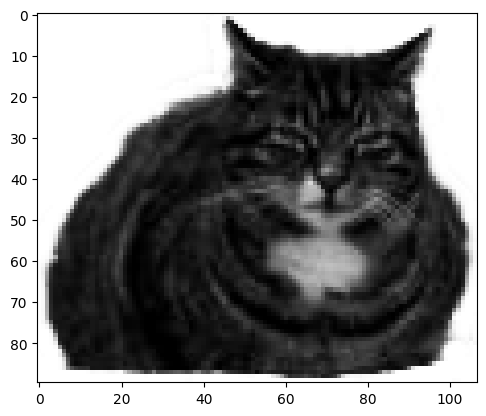

In [119]:
# Definir o valor de gama
gamma = 0.8

# Aplicar a transformação de gama à imagem
img_gama = (255 * (img_o / 255) ** (1 / gamma)).astype(np.uint8)

plt.imshow(img_gama, 'gray')

In [120]:
img_diff_3 = quadratic_difference(img_g, img_gama)
smallest_val, index = find_minimum(img_diff_3)
print('Menor diferença: {}'.format(smallest_val))
print('Posição: {}'.format(index))

Menor diferença: 41507321.0
Posição: (282, 296)


|Gama|Dmin|
|---|---|
|1.0|40844301.0|
|1.1|41447025.0|
|0.9|40734871.0|
|0.8|41507321.0|

Ou seja, concluidos que o melhor gama está entre 0.8 e 0.9
